# Pymaceuticals Inc.
---

### Analysis

- As we can see in the DataFrame called summary_sta_df, we can notice that the Drug Regimen Capomulin is the drug with the best results in general, with the lowest values in each column and by doing a deeper analysis, we can see in the last two scatter plot that exists a strong positive correlation with a result of 0.84, this means that there is a trend and correlation between mouse weight and the average tumor volume observed throughout the Capomulin regimen.
- Finally, we can conclude that sex is not a factor in relation to drug regimen. We can see this in the pie plot with results of 51% male and 49% female.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on = ["Mouse ID"], how = "left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = len(merge_df ["Mouse ID"].unique())
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"],keep = False)]
duplicate_data_id = duplicate_data["Mouse ID"].unique()
duplicate_data_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = merge_df[merge_df["Mouse ID"].isin(duplicate_data_id)]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"],keep = False)
merge_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(merge_clean_df ["Mouse ID"].unique())
new_num_mice

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_sta_df = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_sta_df = summary_sta_df.rename(columns={
                    "mean" : "Mean Tumor Volume",
                    "median" : "Median Tumor Volume",
                    "var" : "Tumor Volume Variance",
                    "std" : "Tumor Volume Std. Dev.",
                    "sem" : "Tumor Volume Std. Err."})
summary_sta_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_sta_df = merge_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
advanced_summary_sta_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

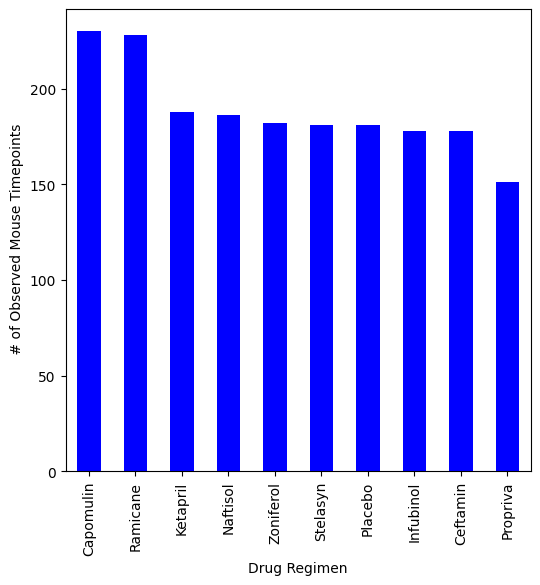

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = merge_clean_df["Drug Regimen"].value_counts()
regimen.plot(kind='bar', figsize=(6,6),color="blue", ylabel=(" # of Observed Mouse Timepoints"))
plt.show()

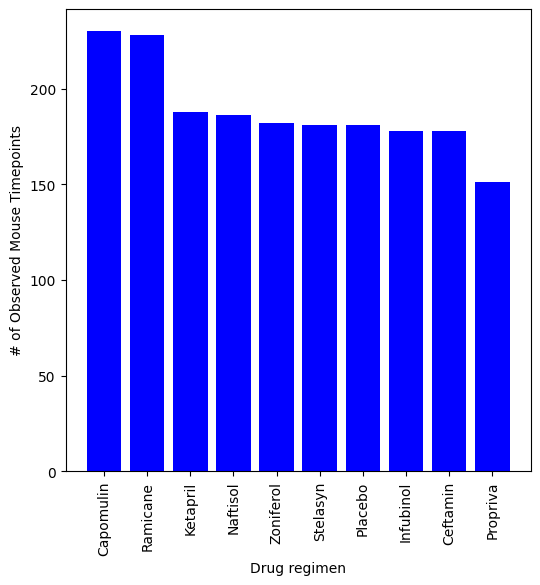

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = merge_clean_df["Drug Regimen"].value_counts()
plt.figure(figsize=(6,6))
plt.bar(regimen.index,regimen.values, color='blue', alpha=1, align="center")
plt.xticks(rotation =90)
plt.xlabel("Drug regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

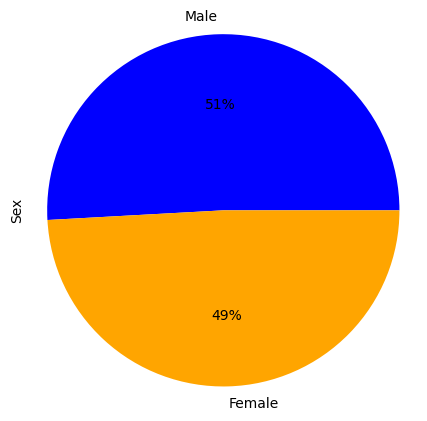

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merge_clean_df["Sex"].value_counts()
gender_distribution.plot(kind='pie', figsize=(5,5),colors=["blue", "orange"],
                        autopct="%1.0f%%", ylabel=("Sex"))
plt.axis("equal")
plt.show()


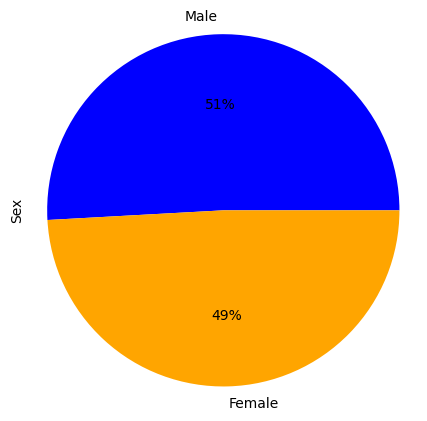

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = merge_clean_df["Sex"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_distribution, labels=gender_distribution.index, colors = ["blue", "orange"],autopct="%1.0f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint_per_mouse = merge_clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data = max_timepoint_per_mouse.merge(merge_clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Start by getting the last (greatest) timepoint for each mouse
 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(specified_regimens)]
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)
    # add subset 
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers:")
    if outliers.empty:
        print("No potential outliers")
    else: 
        print(outliers)

Capomulin's potential outliers:
No potential outliers
Ramicane's potential outliers:
No potential outliers
Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:
No potential outliers


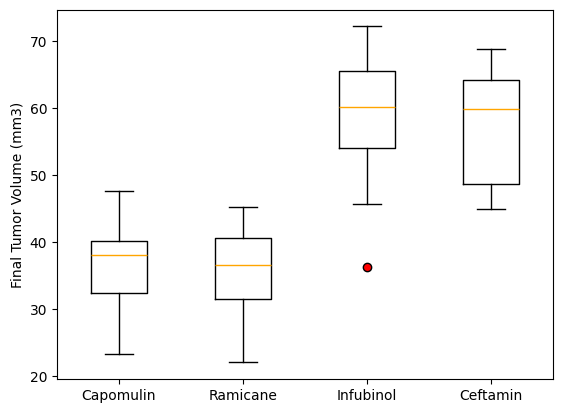

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
red_circle = dict( markerfacecolor = "red", marker = "o")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=treatments, medianprops=dict(color="orange"), flierprops=red_circle)
plt.show()

## Line and Scatter Plots

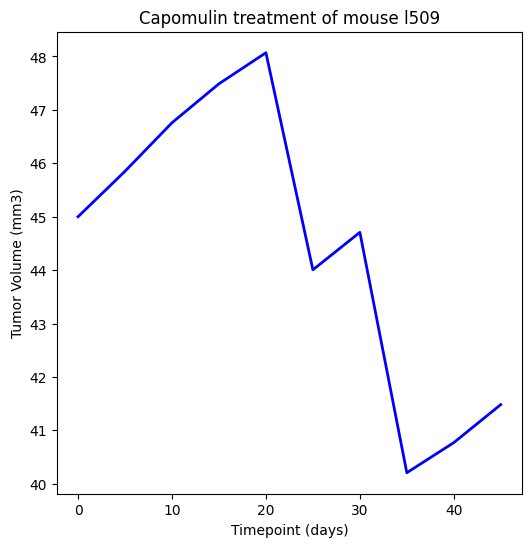

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = merge_clean_df[merge_clean_df["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin[capomulin["Mouse ID"] == "l509"]

plt.figure(figsize=(6, 6))
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], color="blue", linestyle="-", linewidth=2)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [26]:
capomulin_mouse_ids = capomulin['Mouse ID'].unique()
capomulin_mouse_ids

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

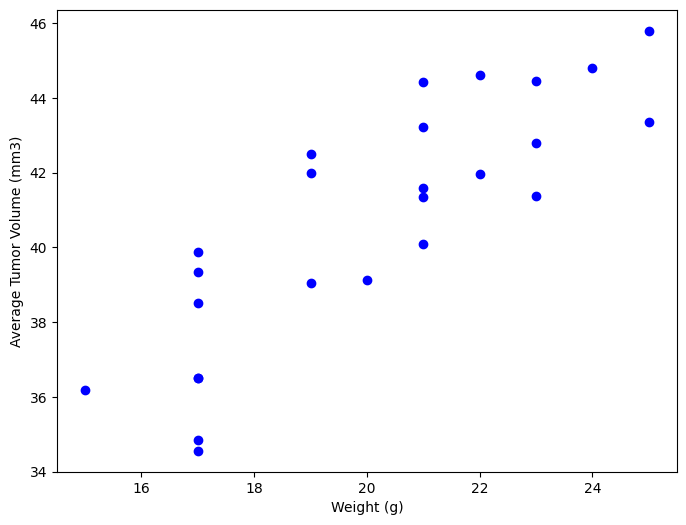

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = merge_clean_df[merge_clean_df["Drug Regimen"] == "Capomulin"]

average_tumor = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor, marker="o", color="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


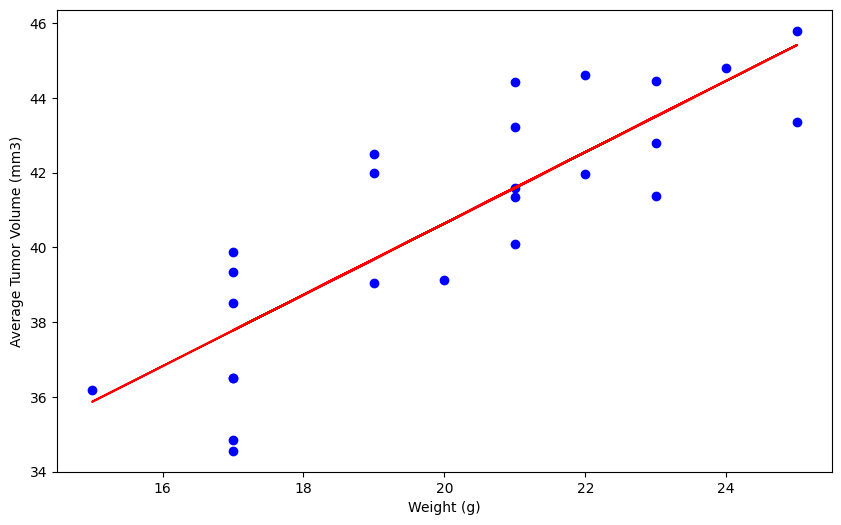

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats

capomulin = merge_clean_df[merge_clean_df["Drug Regimen"] == "Capomulin"]

average_tumor = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()

correlation_coefficient = stats.pearsonr(mouse_weight, average_tumor)[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, average_tumor)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor, marker="o", color="blue")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()